# Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto
## Part I

For this assignment, you will be required to use Watson Studio to build your code to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.
2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

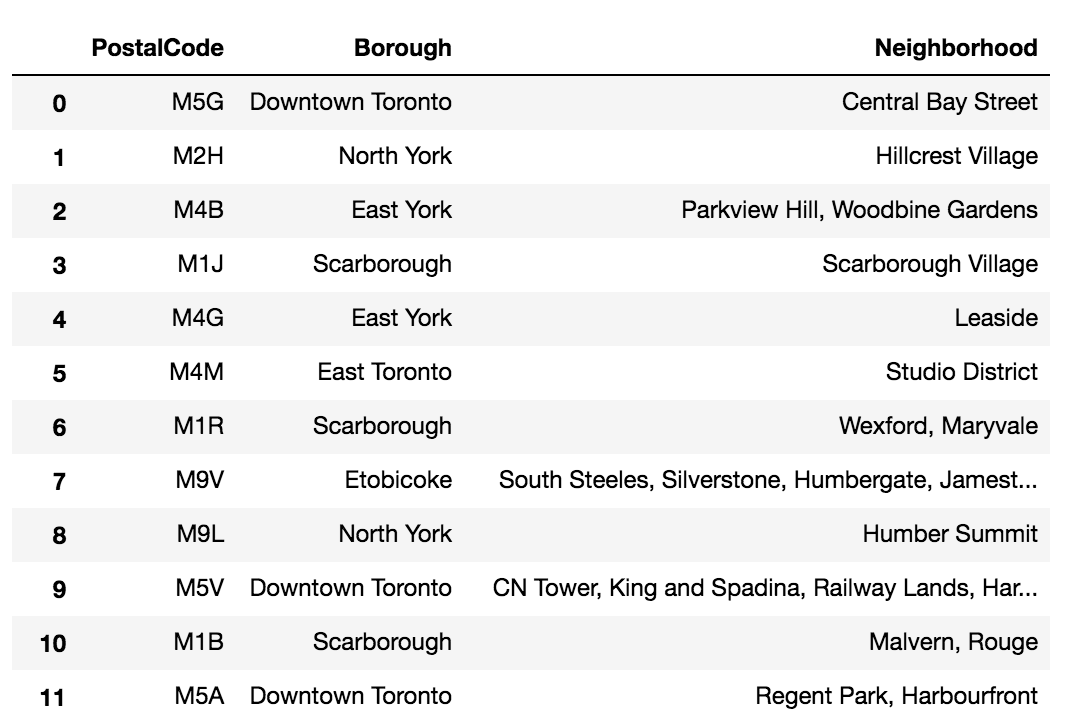

3. To create the above dataframe:

 * The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
 * Only process the cells that have complete information and not greyed out or not assigned.
 * For each cell, the postal code will go under the PostalCode column, the first line under the postal code will go under Borough, and the remaining lines will go under the Neighborhood column formatted nicely and separated with commas as shown in the sample dataframe above. For example, for cell (1, 3) on the Wikipedia page, M3A will go under PostalCode, North York will go under Borough, and Parkwoods will go under Neighborhood.
 * If a cell has only one line under the postal code, like cell (1, 7), then that line will go under the Borough and the Neighborhood columns. So for cell (1, 7), the value of the Borough and the Neighborhood column will be Queen's Park.
 * Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
 * In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

4. Submit a link to your Notebook either using a direct link to your notebook or by pushing it to a Github repository and sharing the link to the notebook on the repository. Make sure that the Notebook is pushed from your Watson Studio account. (**10 marks**)

**Note**: There are different website scraping libraries and packages in Python. One of the most common packages is BeautifulSoup. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples of how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use the BeautifulSoup package to transform the data in the table on the Wikipedia page into the above pandas dataframe.

In [7]:
import re
import pandas as pd
from bs4 import BeautifulSoup

def parse_postal_code(column):
    return column.find('b').get_text() 

def clean_column(column):
    elements = column.find('span')
    brs = elements.find_all('br')
    for br in brs:
        br.replace_with(' ')
    return elements

def find_neighborhoods(text):
    return ', '.join([s.strip() for s in text.replace('(', '').replace(')', '').split('/')])
    
def find_borough_and_neighborhoods(column):
    hoods_reg = re.compile('(?P<borough>.*)(?P<neighborhoods>\(.*\)?)')
    elements = clean_column(column)
    column_content = elements.get_text().strip()
    matches = hoods_reg.search(column_content)
    
    if matches:
        borough = matches.group('borough').strip()
        neighborhoods = find_neighborhoods(matches.group('neighborhoods'))
    else:
        borough = column_content
        neighborhoods = borough
        
    return (borough, neighborhoods)

def parse_column(column):
    postal_code = parse_postal_code(column)
    borough, neighborhoods = find_borough_and_neighborhoods(column)
            
    return [postal_code, borough, neighborhoods]
    
def parse_page(html):
    soup = BeautifulSoup(html, 'html.parser')
    
    container = soup.find('div', id='mw-content-text')
    table = container.find('table').find('tbody')
    df = pd.DataFrame(columns=['PostalCode', 'Borough', 'Neighborhoods'])
    for row in table.find_all('tr'):
        for column in row.find_all('td'):
            not_assigned = column.find('i')
            if not_assigned: continue

            df.loc[len(df)] = parse_column(column)    
            
    return df

def process_page(url):
    df = None
    with open(url) as content:
        df = parse_page(content)
    return df



wiki_url = './toronto_postal_codes.htm'
!wget -q -O 'toronto_postal_codes.htm' https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

toronto_df = process_page(wiki_url)
print(toronto_df.head())

  PostalCode           Borough                     Neighborhoods
0        M3A        North York                         Parkwoods
1        M4A        North York                  Victoria Village
2        M5A  Downtown Toronto         Regent Park, Harbourfront
3        M6A        North York  Lawrence Manor, Lawrence Heights
4        M7A      Queen's Park                      Queen's Park
